In [2]:
import numpy as np 
import pandas as pd 

In [7]:
song_df = pd.read_csv("../data.csv")

In [8]:
song_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [9]:
data_desc = song_df.describe()
data_desc

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


In [11]:
song_filtered = song_df[song_df.popularity >= 30]
song_filtered.count()

acousticness        95867
artists             95867
danceability        95867
duration_ms         95867
energy              95867
explicit            95867
id                  95867
instrumentalness    95867
key                 95867
liveness            95867
loudness            95867
mode                95867
name                95867
popularity          95867
release_date        95867
speechiness         95867
tempo               95867
valence             95867
year                95867
dtype: int64

In [12]:
features = song_filtered.drop(["id", "artists", "explicit","mode", "popularity", "release_date",  "year", "name", "duration_ms"], axis=1)
features.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence
2106,0.89200,0.596,0.314,0.000001,9,0.1680,-10.024,0.0290,99.442,0.599
2186,0.00318,0.390,0.637,0.000129,2,0.4430,-4.498,0.0273,90.328,0.681
2201,0.55600,0.571,0.751,0.000000,2,0.0646,-9.544,0.0585,91.002,0.966
2229,0.73900,0.588,0.512,0.000030,4,0.2270,-12.253,0.0302,140.257,0.920
2318,0.28800,0.540,0.620,0.000000,0,0.1070,-7.430,0.0319,132.174,0.483


In [13]:
songs = song_filtered[["id", "name", "artists", "explicit","mode", "popularity",  "year", "duration_ms"]]
songs = songs.rename({"id": "song_id"}, axis="columns")
songs = songs.astype({'mode':'int32', 'explicit':'int32'})
songs.head()

,song_id,name,artists,explicit,mode,popularity,year,duration_ms
2106,67LQpgGMjI0jnXo9lRj07C,A Volta do Boêmio,['Nelson Gonçalves'],0,0,42,1960,185667
2186,5zUJlRQyzxw09Jv1hDgL5h,Twist à Saint-Tropez,"['Les Chats Sauvages', 'Dick Rivers']",0,1,37,1961,104600
2201,0Cx7w1aXcvsPBdfdND0Pju,Presumida (High Class Baby),['Los Teen Tops'],0,1,36,1961,126387
2229,2xdIHrH1a0IuThQTbwpzmc,Popotitos (Bonie Moroni),['Los Teen Tops'],0,1,35,1961,170800
2318,5yba7vPDvRGqV1LfhgnuLL,Lessons in Love - 2005 Remaster,"['Cliff Richard', 'The Shadows']",0,1,30,1962,168360


In [14]:
songs.count()

song_id        95867
name           95867
artists        95867
explicit       95867
mode           95867
popularity     95867
year           95867
duration_ms    95867
dtype: int64

In [16]:
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

## **Visualization**

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

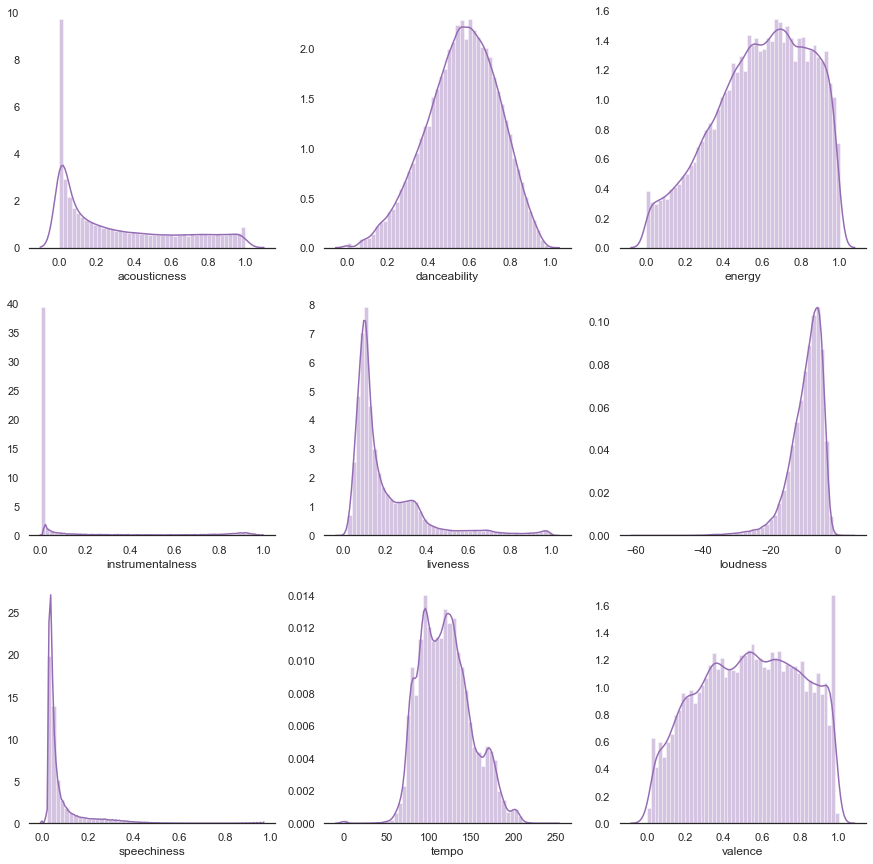

In [18]:
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(15, 15))
sns.despine(left=True)
ft = features.drop("key", axis=1)
for i, col in enumerate(ft.columns):
    r = i // 3
    c = i % 3
    sns.distplot(features[col], color="m", ax=axes[r, c])

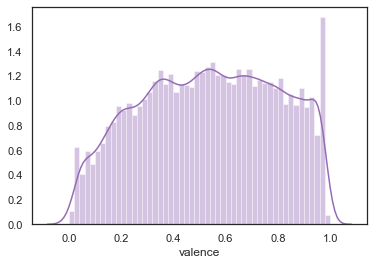

In [19]:
sns.distplot(features["valence"], color="m")

In [20]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA
from sklearn.preprocessing import minmax_scale
import json

## Scaling the values using min max scaler

In [21]:
feature_vals = features.values
feature_vals = minmax_scale(feature_vals)
sample_size = 5000
np.random.seed(13437375)
sample_ids = np.random.choice(feature_vals.shape[0], sample_size, replace=False)
feature_samples = feature_vals[sample_ids, :]

In [22]:
scaled_features = pd.DataFrame(feature_vals, columns=features.columns)

save a copy of scaled_features

In [24]:
songs_temp = songs.reset_index()

## **Vizualization of feature space using Linear and Non Linear decomposition**

## PCA

In [25]:
pca = PCA(n_components=3)
linear_embeddings = pca.fit_transform(feature_samples)

In [26]:
df = pd.DataFrame(linear_embeddings, columns=['X', 'Y', 'Z'])
df_pca = df
df.head()

,X,Y,Z
0,-0.432144,0.281812,0.327250
1,-0.251986,0.322981,-0.136860
2,-0.369145,-0.349984,0.266465
3,-0.074424,0.089649,-0.256440
4,0.442595,0.021562,0.045603


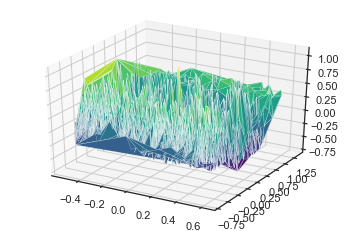

In [27]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
plt.show()

## Survey of Distance Metrics

In [28]:
#idx for 4e5lEqydMatcEio6ef9Dpf (Phenomenal by Eminem)
sample_id = songs_temp[songs_temp.song_id == '4e5lEqydMatcEio6ef9Dpf'].index.tolist()[0]
print(sample_id)
sample_id = np.where(sample_ids == sample_id)[0][0]
print(sample_id)

8482
4691


In [29]:
sample_ids[sample_id]

8482

In [31]:
# euclidean
def euclidean_dist(u, v):
    a = np.subtract(u, v)
    dist = np.dot(np.transpose(a), a)
    return dist

In [32]:
def dist_2songs(feature1, feature2):
    dist = -1;
    a = np.subtract(feature1, feature2)
    dist = np.dot(np.transpose(a), a)
        
    return dist


### Euclidean distance based recommendations

In [34]:
distances = []
for i in feature_samples:
    distances.append(euclidean_dist(feature_samples[sample_id], i))
    
print(len(distances))
euc_recoms = np.argsort(np.array(distances))[1:16]
euc_recoms = sample_ids[euc_recoms]
euc_rec_name = songs_temp.name[euc_recoms].tolist()
euc_rec_ids = songs_temp.song_id[euc_recoms].tolist()

print(euc_rec_name)    
    

5000
['Go Hard, Go Home (feat. Giz, Swellz & Choppa)', 'Under the Graveyard', 'Soliá', 'Let Love In', 'Some Hearts', 'Desert Rose', 'Innocent', 'Thought About You', 'Forget It (feat. Oliver Tree)', 'Descending', 'Exodus', "C'Mon", 'Ahora Me Llama - Remix', 'I Tried Loving', 'By the Way']


### PCA - euclidean based recommendations

In [35]:
distances = []
for i in df_pca.values:
    distances.append(euclidean_dist(df_pca.values[sample_id], i))
    
print(len(distances))
pca_recoms = np.argsort(np.array(distances))[1:16]
pca_recoms = sample_ids[pca_recoms]
pca_rec_name = songs_temp.name[pca_recoms].tolist()
pca_rec_ids = songs_temp.song_id[pca_recoms].tolist()

print(pca_rec_name)    
    

5000
['Well Done', 'Go Hard, Go Home (feat. Giz, Swellz & Choppa)', 'Forget It (feat. Oliver Tree)', 'Justify My Love', 'God of Revival - Live', 'Almeda', 'Everything Is You', 'ROCKSTAR 101', 'No One', 'That Good', 'Agnes', 'Cinnamon Girl', 'Desert Rose', 'Pennyroyal Tea', 'Catchafire (Whoopsi-Daisy)']
